## Data Visualization with Python
**Work by: Jamie Yeo Jin Yih**

This notebook is intended to showcase the <b>Python for Data Visualization skills</b> that I possess as of <i>1 February 2019</i>

**Libraries**
- [pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html#overview)
- [NumPy](http://www.numpy.org/)
- [matplotlib](https://matplotlib.org/gallery/index.html)
- [seaborn](https://seaborn.pydata.org/examples/index.html)

**Datasets**
- [Korea Tourism Organisation](https://kto.visitkorea.or.kr/eng/tourismStatics/keyFacts/visitorArrivals.kto) for Dataset 1 & 6
- Hospital Admissions by Sector, Gender and Age Group, [data.gov.sg](https://data.gov.sg/dataset/hospital-admissions) for Dataset 2
- Exploring Gender Equality in US Wages
, [Kaggle](https://www.kaggle.com/monkeasy/exploring-gender-equality-in-us-wages/data) for Dataset 3
- [Yahoo Finance GOOG](https://finance.yahoo.com/quote/GOOG) and [Yahoo Finance AAPL](https://finance.yahoo.com/quote/AAPL) for Dataset 4 & 5
- [Kaggle](https://www.kaggle.com/wendykan/lending-club-loan-data) for Dataset 7 & 8
- [Kaggle](https://www.kaggle.com/monkeasy/exploring-gender-equality-in-us-wages/data) for Dataset 9

**Import libraries & settings**

In [32]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Display all floats rounded off to 1 decimal place
pd.options.display.float_format = '{:,.2f}'.format
# Plot inline in Jupyter notebook
%matplotlib inline
# Settings throughout the notebook
sns.set()
# Width = 16, Height = 6
DIMS=(16, 6)

### Descriptive Statistics

Generate `descriptive statistics` that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

In [33]:
# Dataset 1

kto_arr_df = pd.read_csv('kor-tourist-arrivals.csv')
print(kto_arr_df.describe())

kto_arr_df['visitor_arrivals_m'] = kto_arr_df['visitor_arrivals'].apply(lambda x : x/1000000)
print(kto_arr_df.describe())

kto_depart_df = pd.read_csv('kor-tourist-departures.csv')
kto_depart_df['visitor_departures_m'] = kto_depart_df['visitor_departures'].apply(lambda n : n/1000000)

          year  visitor_arrivals
count    19.00             19.00
mean  2,005.00      6,964,907.58
std       5.63      2,967,252.10
min   1,996.00      3,683,779.00
25%   2,000.50      4,949,983.00
50%   2,005.00      6,022,752.00
75%   2,009.50      8,307,595.50
max   2,014.00     14,201,516.00
          year  visitor_arrivals  visitor_arrivals_m
count    19.00             19.00               19.00
mean  2,005.00      6,964,907.58                6.96
std       5.63      2,967,252.10                2.97
min   1,996.00      3,683,779.00                3.68
25%   2,000.50      4,949,983.00                4.95
50%   2,005.00      6,022,752.00                6.02
75%   2,009.50      8,307,595.50                8.31
max   2,014.00     14,201,516.00               14.20


### Line Graphs
**Represent the S Korea Tourist Arrivals & Departures, 2000 - 2015 as a `line graph`**

A `line graph` is used to show a trend in data over time, or time-series data. The  x -axis will have the various time periods (year, month, day, quarter etc.) and the  y -axis will show the metric.

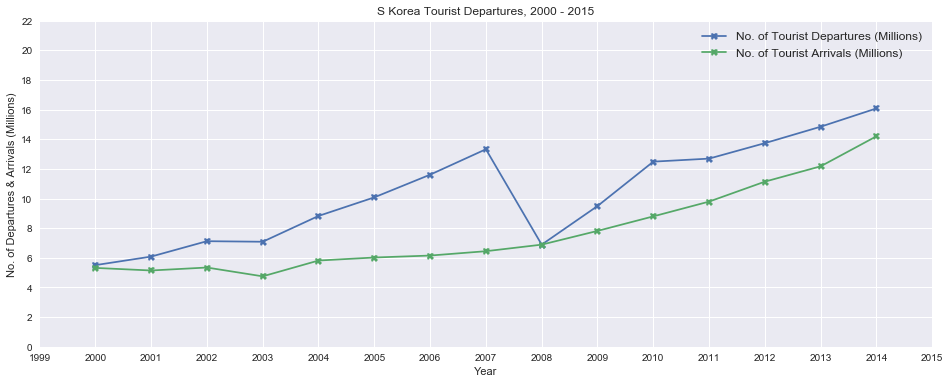

In [34]:
# Dataset 1

fig = plt.figure(figsize=DIMS)
ax1 = fig.add_subplot(111)

kto_depart_df[kto_depart_df['year']<=2014].plot(kind='line', x='year', y='visitor_departures_m', marker="X",
             title="S Korea Tourist Departures, 2000 - 2015", ax=ax1)
kto_arr_df[kto_arr_df['year']>=2000].plot(kind='line', x='year', y='visitor_arrivals_m', marker="X",
             title="S Korea Tourist Departures, 2000 - 2015", ax=ax1)

plt.xticks(np.arange(1999, 2016))
plt.xlabel("Year")

plt.yticks(np.arange(0, 24, 2))
plt.ylabel("No. of Departures & Arrivals (Millions)")

ax1.legend(["No. of Tourist Departures (Millions)", "No. of Tourist Arrivals (Millions)"], fontsize=12)

### Bar Graphs

**Represent the percentage of Female Patients Admitted, year = 2014**

Bar graphs are used to examine cross-sectional or categorical data. This involves looking at different segments of the population at one point in time. It could mean observations at a certain year, quarter or month.

Text(0.5,1,'Percentage of Female Patients Admitted, year = 2014')

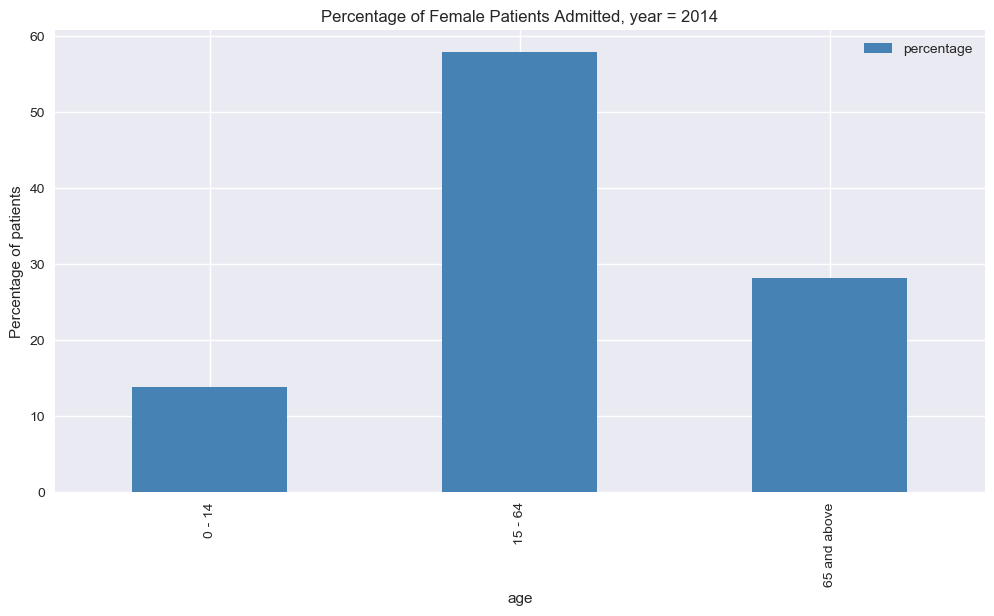

In [71]:
# Dataset 2

admissions_df = pd.read_csv('patient-admissions.csv')
admissions_df

admissions_g_df = admissions_df.copy()

#Filter for Females
admissions_g_df = admissions_g_df[admissions_g_df['gender'] == 'Female']

#Plot Bar Graph
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 1, 1)
# Your turn: Plot the bar plot. Specify the kind, x, y, title, figsize, ax and color='skyblue' params
admissions_g_df.plot(kind='bar', x='age', y='percentage', 
                    ax=ax1, color='steelblue')
# Add the ylabel using ax.set_ylabel()
y1 = "Percentage of patients"
ax1.set_ylabel(y1)
t1 = "Percentage of Female Patients Admitted, year = 2014"
ax1.set_title(t1)


### Clustered Bar Graphs

** Represent the percentage of Patients admitted, year=2014, separated by gender**

To show comparisons within a cohort, use a clustered bar graph. This will show the differences within groups, across the segments determined by the  x -axis.

Text(0,0.5,'Percentage of patients')

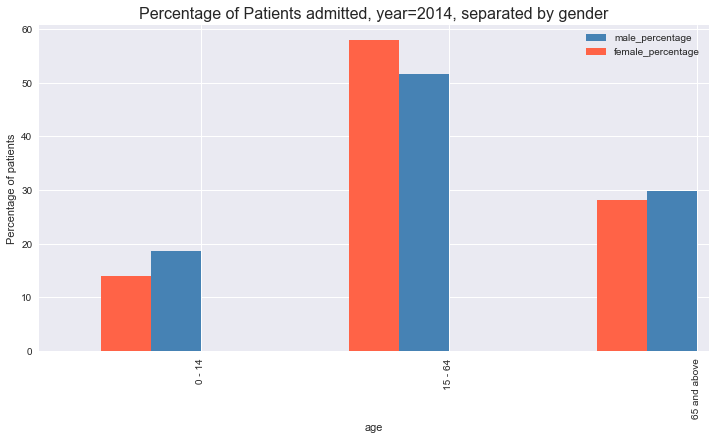

In [36]:
# Dataset 2

admissions_by_gender_df = pd.read_csv('patient-admissions-by-gender.csv')
admissions_by_gender_df

#Plot Clustered Bar Graphs
width=0.20

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 1, 1)

admissions_by_gender_df.plot(kind='bar', x='age', y='male_percentage', 
                            ax=ax1, color='steelblue', position=1,
                            width=0.2)
admissions_by_gender_df.plot(kind='bar', x='age', y='female_percentage', 
                            ax=ax1, color='tomato', position=2,
                            width=0.2)
ax1.set_title("Percentage of Patients admitted, year=2014, separated by gender",
             fontsize=16)
ax1.set_ylabel("Percentage of patients")

### Boxplot

**Represent the boxplot of US Weekly Wages**

A boxplot is useful to check for outliers in a dataset. To plot a boxplot, simply use plot(kind='box') for the Series.

Text(0.5,1,'Boxplot of US Weekly Wages')

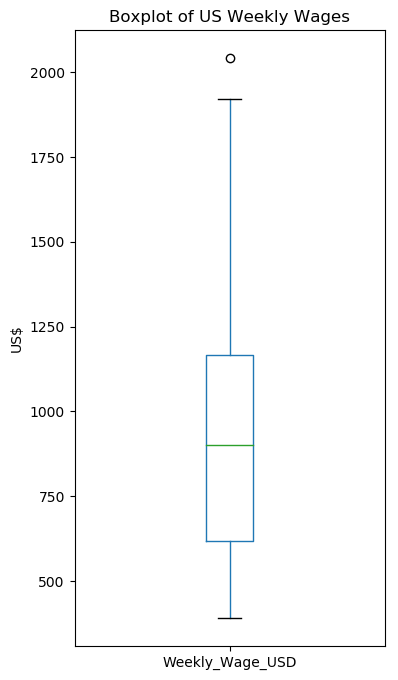

In [37]:
# Dataset 3

wages_df = pd.read_csv('wages-by-occupation.csv')

#seaborn
sns.reset_orig()

fig = plt.figure(figsize=(4, 8))
ax = fig.add_subplot(111)

# Plot the boxplot
wages_df['Weekly_Wage_USD'].plot(kind='box', ax=ax)
ax.set_ylabel("US$")
ax.set_title("Boxplot of US Weekly Wages")

**Insights**

The bottom and top of the box represents the 25th percentile and the 75th percentile respectively. The line in the middle of the box is the 50th percentile or median. The whiskers represent the lower and upper bound calculated by adding and subtracting  1.5×IQR1.5×IQR  from the first and third quartile respectively. Any value outside the whiskers are outliers. You can validate this using df.describe().

**Multiple Box Plots**

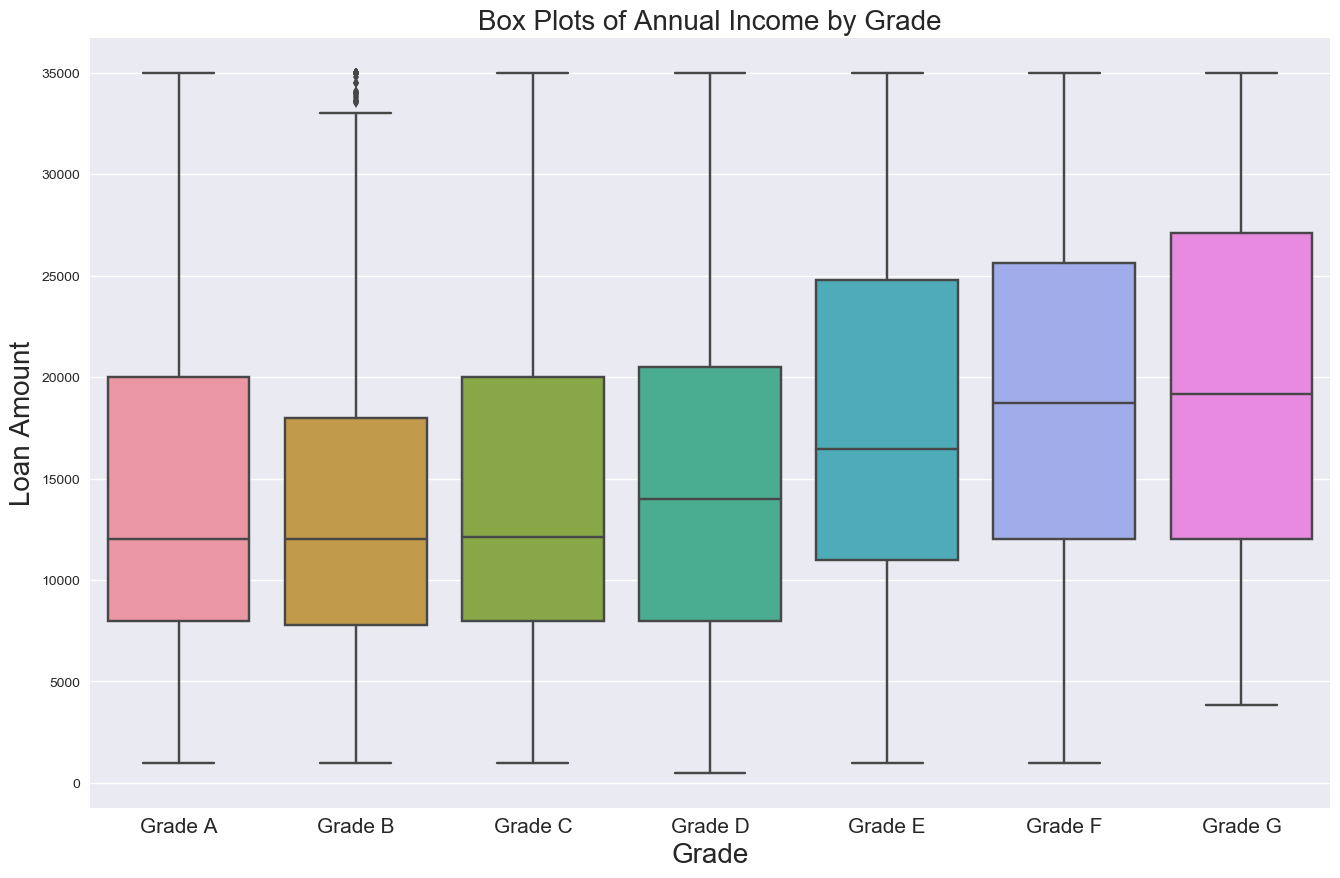

In [80]:
#Dataset 7

fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111)
sns.boxplot(data=loans_df.sort_values('grade'), x='grade', y='loan_amnt')
ax.set_xticklabels(['Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E', 'Grade F', 'Grade G'],fontsize=15)
ax.set_title('Box Plots of Annual Income by Grade', fontsize=20)
ax.set_ylabel("Loan Amount",fontsize=20)
ax.set_xlabel("Grade",fontsize=20)

plt.show()

### Scatterplot

**Represent the relationship between the closing price of GOOG and AAPL**

A scatter graph can be used to spot relationships between variables. Each axis represents a variable, and each coordinate represents the joint observation of both variables. The closer all the points are closer to some defined line (linear, quadratic, exponential etc.), the stronger the correlation between the variables based on that function.

0.7317969479475454


Text(0.5,1,'Closing price of GOOG & AAPL, 2017-10-09 to 2018-10-12')

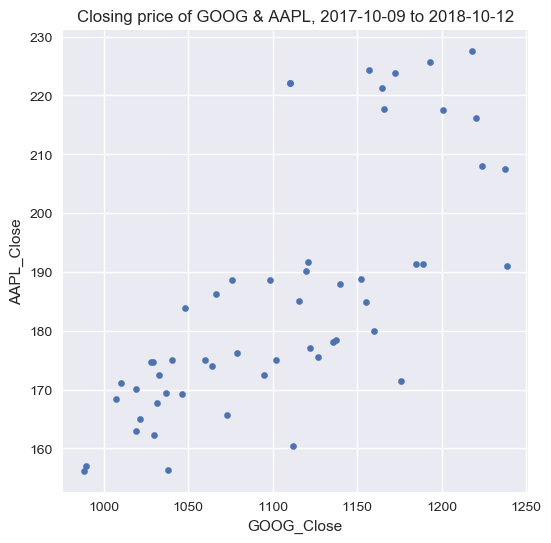

In [38]:
# Dataset 4 & 5

goog_df = pd.read_csv('goog-close.csv')
aapl_df = pd.read_csv('aapl-close.csv')

#merge both into 1 df
tech_shares_df = goog_df.merge(aapl_df, on='Date')

print(tech_shares_df['AAPL_Close'].corr(tech_shares_df['GOOG_Close']))
#seaborn
sns.set()

# Plot the scatter plot
fig = plt.figure(figsize=(6, 6)) # (8, 8)
ax = fig.add_subplot(1, 1, 1)
tech_shares_df.plot(kind='scatter', x='GOOG_Close',
                    y='AAPL_Close', ax=ax)
ax.set_title("Closing price of GOOG & AAPL, " + 
            tech_shares_df['Date'].min() + " to " +
            tech_shares_df['Date'].max())

**Insights**

With a (Pearson) correlation  ρ=0.732ρ=0.732 , the closing price of GOOG and AAPL have strong correlation. 

However, strong correlation does not imply causation. Closing price of AAPL does not necessarily directly impact the closing price of GOOG. 
Additional research needs to be performed to ascertain this relationship.

### Histogram

**Represent the loan amount by all borrowers**

A histogram is used to plot the count of individual observations within a bin. Each bin has a specified range as determined by the position and width of the bar.

/Users/jamieyeo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Loan amount (USD)')

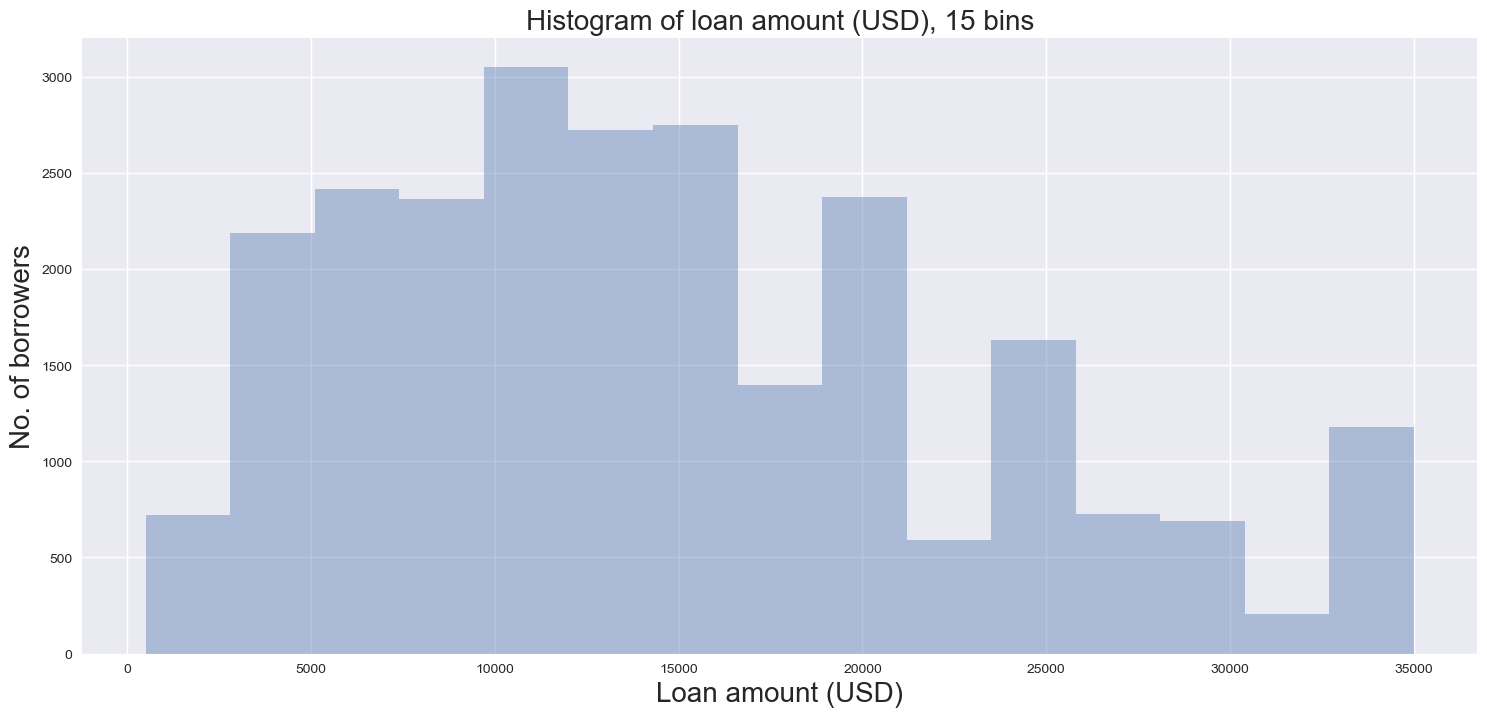

In [44]:
# Dataset 7

loans_df = pd.read_csv('loans-25k.csv')

# Plot a histogram for 'loan_amnt'.
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(111)

#seaborn
sns.distplot(loans_df['loan_amnt'], kde=False, ax=ax1, bins=15)

ax1.set_title("Histogram of loan amount (USD), 15 bins", fontsize=20)
ax1.set_ylabel("No. of borrowers", fontsize=20)
ax1.set_xlabel("Loan amount (USD)", fontsize=20)


** Find the no. of observations in each bin**

In [58]:
loans_df_bin = loans_df.copy()
loans_df_bin['loan_amnt_bin'] = pd.cut(loans_df_bin['loan_amnt'], bins=15)

df_bins_count = loans_df_bin.groupby('loan_amnt_bin').size().reset_index(name='No. of observations')
df_bins_count

,loan_amnt_bin,No. of observations
0,"(465.5, 2800.0]",755
1,"(2800.0, 5100.0]",2162
2,"(5100.0, 7400.0]",2419
3,"(7400.0, 9700.0]",2367
4,"(9700.0, 12000.0]",4436
5,"(12000.0, 14300.0]",1340
6,"(14300.0, 16600.0]",2743
7,"(16600.0, 18900.0]",1400
8,"(18900.0, 21200.0]",2373
9,"(21200.0, 23500.0]",596


### Multiple Bar Charts

**Plot the no. of Loans by Grade in 36 months term & 60 months term**

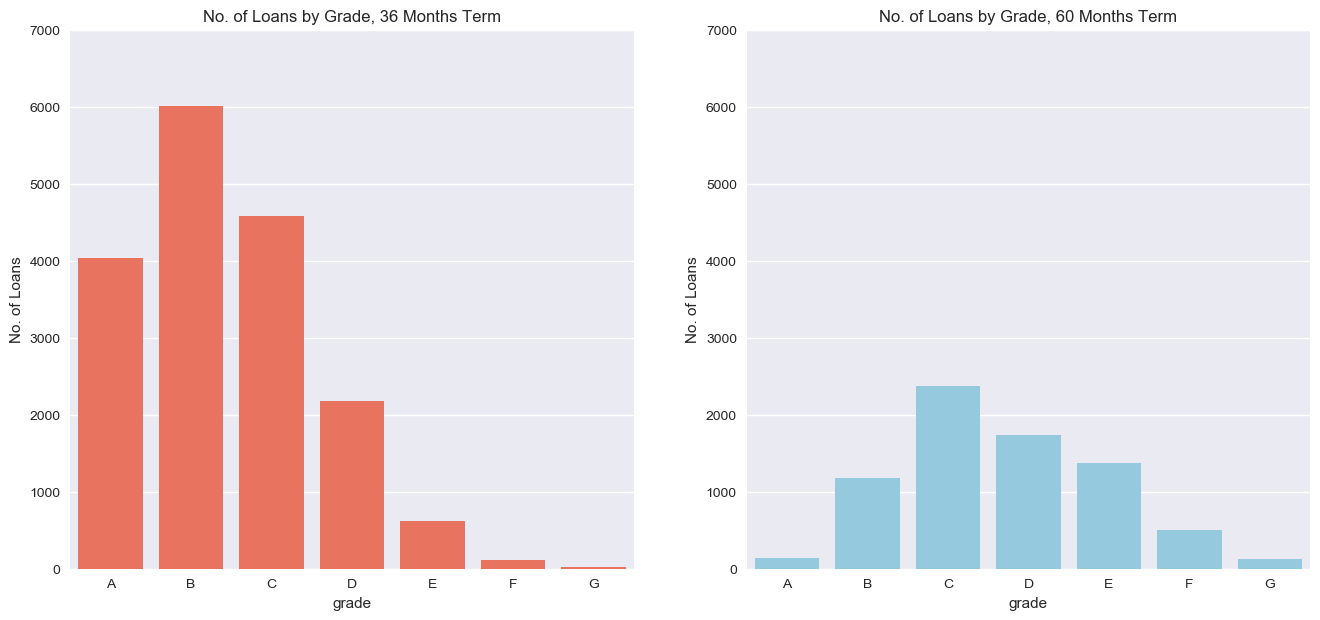

In [62]:
term_grade_loans_df = loans_df.copy()

# Isolate only the following 3 columns: 'id', 'term', 'grade'
term_grade_loans_df = term_grade_loans_df[['id', 'term', 'grade']]

# Count the number of loans belonging to each term and belonging 
term_grade_loans_agg = term_grade_loans_df.groupby(['term', 'grade']).size().reset_index(name="No. of Loans")

# Create the term_grade_loans_pivot where the index is grade and the columns are the different terms
term_grade_loans_pivot = pd.pivot_table(term_grade_loans_agg, index=['grade'], columns=['term'],
                                       values='No. of Loans', aggfunc=np.sum)
# Then reset the index and set the columns to be 3 columns: 'grade', '36 months', '60 months'
term_grade_loans_pivot = term_grade_loans_pivot.reset_index()
term_grade_loans_pivot.columns = ['grade', '36 months', '60 months']

#Plot multiple bar charts
fig = plt.figure(figsize=(16, 7))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#Plot for 36 months
sns.barplot(x=term_grade_loans_pivot['grade'], y=term_grade_loans_pivot['36 months'], ax=ax1
           ,color="tomato")
ax1.set_ylabel("No. of Loans")
ax1.set_title("No. of Loans by Grade, 36 Months Term")
ax1.set_yticks(np.arange(0, 7500, 1000)) #This needs to be specified so both charts are on the same scale.

#Plot for 60 months
sns.barplot(x=term_grade_loans_pivot['grade'], y=term_grade_loans_pivot['60 months'], ax=ax2
           ,color="skyblue")
ax2.set_title("No. of Loans by Grade, 60 Months Term")
ax2.set_ylabel("No. of Loans")

# Set the scale of the plots to be the same.
ax2.set_yticks(np.arange(0, 7500, 1000)) #This needs to be specified so both charts are on the same scale.

#Show the graph
plt.show()

### Stacked Bar Charts

A stacked bar chart can be used to see the number of observations within a cohort, and the cohort's cumulative sum. In this case, we want to see how many loans belonging to each grade divided by its different loan terms. Hence, we group the data by these 2 columns. Use df.groupby() and size() to perform this counting. Note that df.groupby() can take also take in a list as its parameter.

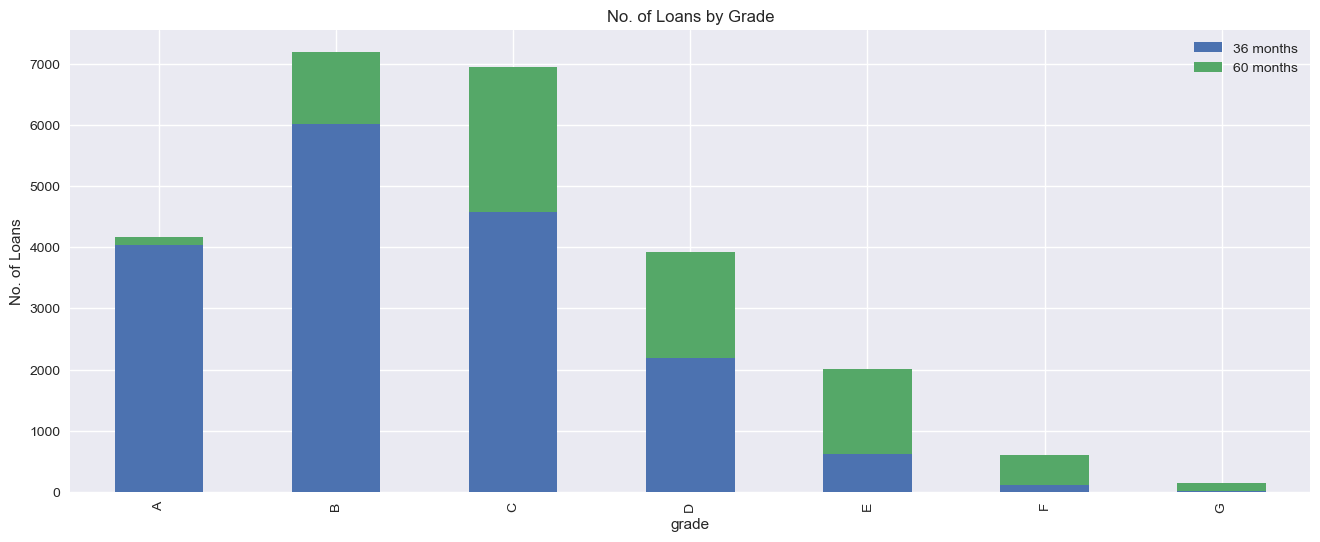

In [63]:
# the column that I would like to be the  xx -axis needs to be the index.
term_grade_loans_pivot_grade_i = term_grade_loans_pivot.set_index('grade')

# Plot the stacked bar chart
fig, ax1 = plt.subplots()
term_grade_loans_pivot_grade_i.plot(kind='bar', stacked=True, 
                                  figsize=DIMS, title="No. of Loans by Grade",
                                   ax=ax1)
ax1.set_ylabel("No. of Loans")
plt.show()

### Jointplot

**Represent the Loan Amount vs Interest Rate of Loans**

A jointplot is used to see the joint observation of datapoints. One axis will show the distribution of one metric while the other axis will show the distribution of the other metric.

Each hexagon exists in a 2 dimensional space that represents a bin corresponding to the concurrent observation of  X=xX=x  and  Y=yY=y . In this plot, the darker the hexagon, the more observations are in that bin.

/Users/jamieyeo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jamieyeo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 640x480 with 0 Axes>

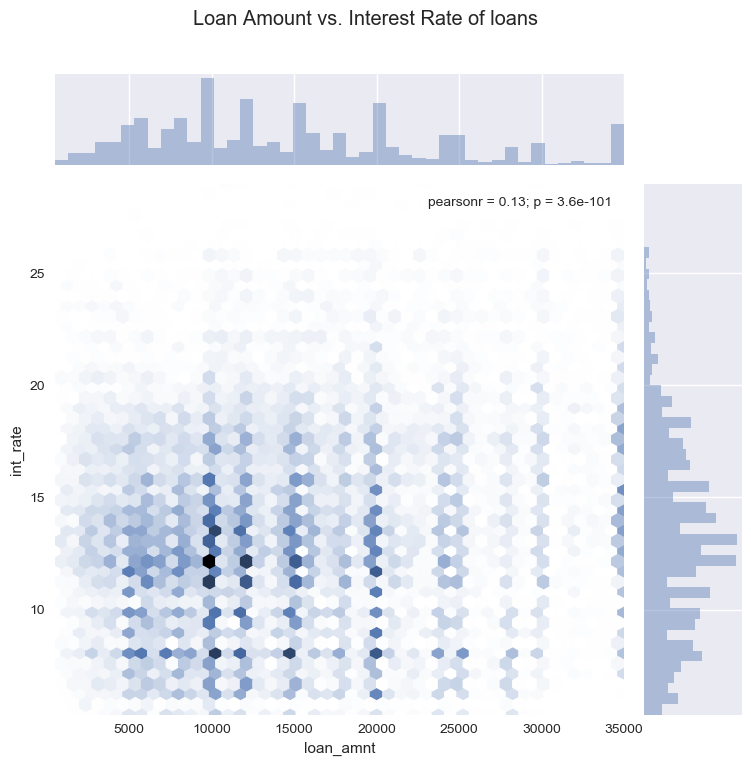

In [68]:
fig = plt.figure()
# Plot the joint plot here. Set the x, y and kind='hex' parameter
g = sns.jointplot(data=loans_df, x = 'loan_amnt', y = 'int_rate', kind='hex')
# Set the size of the plot and the title.
g.fig.suptitle('Loan Amount vs. Interest Rate of loans')
g.fig.set_size_inches(8,8)
# Shrink the plot by 10% so the title is visible.
plt.subplots_adjust(top=0.9)

### Wordcloud

A wordcloud is useful to find out what are common words in a corpus of texts. A corpus is simply a collection of text documents. Before building a wordcloud, first collect all the texts

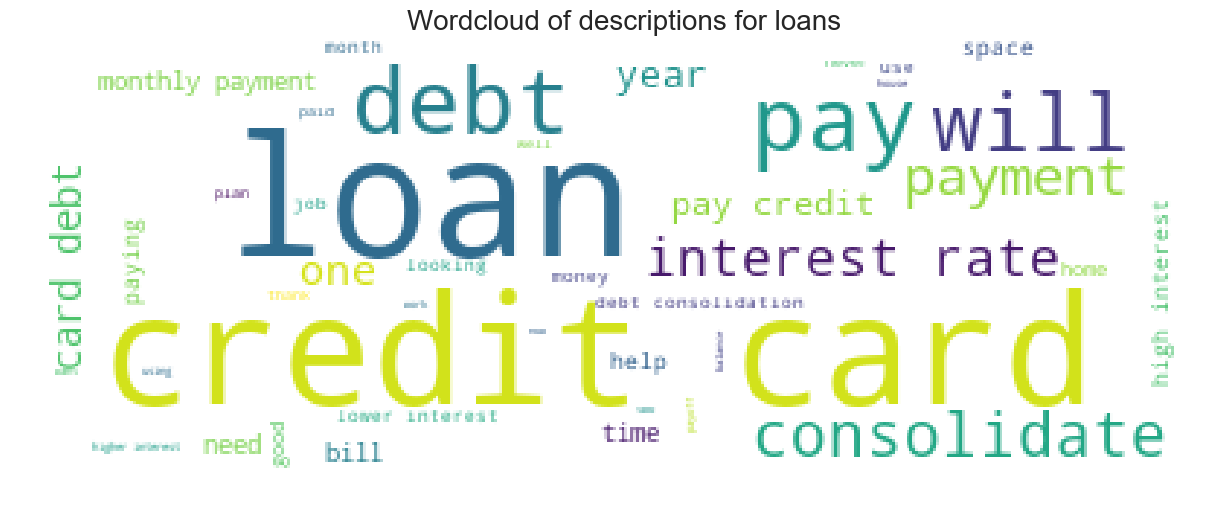

In [66]:
# Dataset 8

desc_df = pd.read_csv('loans-descs-100.csv', sep='|')

# store the values in the 'desc' column into descriptions_series.
descriptions_series = desc_df['desc']

descriptions_list = descriptions_series.tolist()

descriptions_step1 = []
for d in descriptions_list:
    # Remove the first bunch of letters
    d2 = re.sub('Borrower added on (\d/?)+\s>', '', d)
    # Remove HTML tags
    d2 = re.sub('<[a-z]+/?>', '', d2)   
    # Remove special characters
    d2 = re.sub('[-_,$&!.;%]', '', d2) 
    # Convert to lower case, remove leading and trailing spaces
    d2 = d2.strip().lower()   
    descriptions_step1.append(d2)
    
long_str_descriptions = ''
for d in descriptions_step1:
    long_str_descriptions = long_str_descriptions + ' ' + d

# Plot Wordcloud
plt.figure(figsize=(15,8))
desc_wordcloud = WordCloud(
    width=400, height=150,
    background_color="white", 
    max_words=150, relative_scaling = 1.0).generate(long_str_descriptions)
plt.imshow(desc_wordcloud)
plt.axis("off")
plt.title("Wordcloud of descriptions for loans", fontsize=20)
plt.show()
